# Rapport Laforge - Hassouna Clustering

### Imporation des librairies à éxécuter .. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#  Paramètres à modifier facilement
dataset_name = 'smile3.arff'   # <-- change juste cette ligne quand tu veux un autre dataset

# --- Chargement du dataset ---
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    # On suppose que la dernière colonne est une étiquette non numérique
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

file_path = os.path.join('../dataset', 'artificial', dataset_name)
X = load_arff_data(file_path)
print("Shape du dataset :", X.shape)

# --- Standardisation des données (important pour K-Means) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape du dataset : (1000, 2)


##### importation d'une data set et affichage sans aucune intervention

Shape du dataset : (2990, 2)


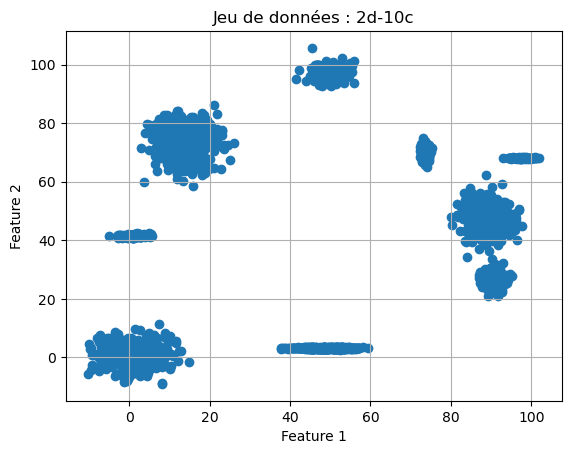

In [3]:
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    # On suppose que la dernière colonne est une étiquette non numérique
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

file_path = os.path.join('../dataset', 'artificial', '2d-10c.arff')

X = load_arff_data(file_path)
print("Shape du dataset :", X.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Jeu de données : 2d-10c")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## K-means : 

Silhouette Score = 0.541


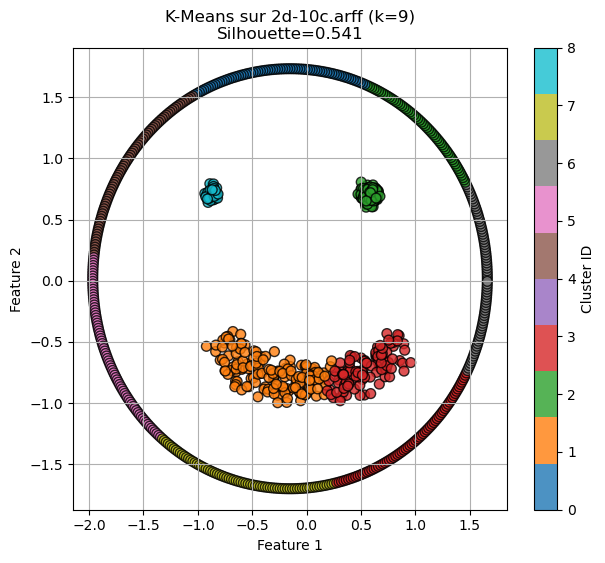

In [ ]:


# --- Application de K-Means ---
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# --- Évaluation de la qualité du clustering ---
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score = {silhouette:.3f}")

# --- Affichage des clusters ---
plt.figure(figsize=(7, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
plt.title(f"K-Means sur 2d-10c.arff (k={k})\nSilhouette={silhouette:.3f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

### Exemple Réussi: diamond9.arff avec K = 9 
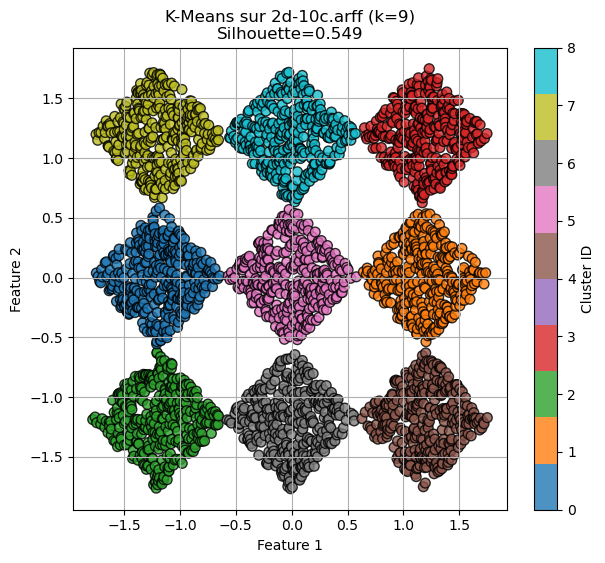


pourquoi ? :

k-means est une méthode qui associe chaque points du dataset au cluster dont le barycentre est le plus proche.
**Elle minimise ainsi la distance intra-cluster**.
Une interprétation possible de cet aspect est que,
cette approche découpe l'espace des points en sections géométrique où chaque point fais partie du même cluster.

Dans l'exemple "diamond9", les clusters sont bien spatialement séparés et géométriquement arrangés.
Ces propriétés font qu'il existe une liste de neufs barycentres tels que les points sont correctement associés à leurs clusters (c'est notre solution).

En revanche pour le cas "2d-10c", ces propriétés ne sont pas vérifiés.
Un cluster attendu, celui du contour, s'étale dans l'espace des point,
si bien qu'il n'existe plus quatres barycentres tels que nous obtenons les clusters attendus.
En conséquence, KMeans vas faire de son mieux et nous donner une mauvaise solution, mais adaptée à notre k d'entrée.


### Explication des avantages de k-mean 

Le but de k-means est de maximiser la similarité intra-cluster, **au mépris de la minimisation de la similarité inter-cluster**.
Cette similarité, comme beaucoup de méthodes, se base sur la fonction distance.
deux points sont considérés similaires si ils sont proche, ainsi maximiser la similarité est équivalent à minimiser la distance.

La conséquence, pour k-means, de ne pas tenir compte de la similarité inter-cluster est que:
Il pourra donner des résultats non qualitatifs sur des jeux de données dont les clusters attendus ne sont pas définissable par des barycentres

### Exemple non Réussi de K-mean banana.arff  k=2


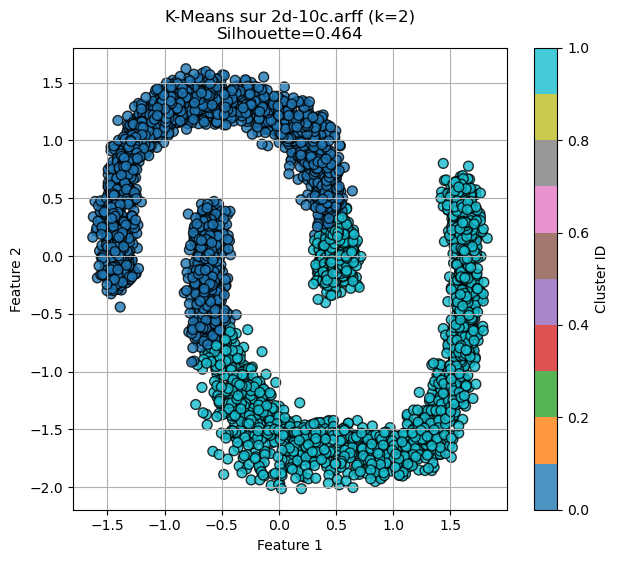*

pourquoi ? :

l'exemple "banana" nous permet de mieux comprendre ce que veux dire un mauvais jeu de donnée pour k-means.
Ici les clusters ne sont pas convexes, et k-means ne sais pas géré cela.
Les barycentres des solutions ne font pas parties des clusters eux mêmes,
et ceux ci sont imbriqué entre eux, venant faire échouer l'évaluation de la similarité intra-cluster.

NB:
Si les deux clusters n'étais pas imbriqués entre eux, l'évaluation de la similarité intra-cluster n'échouerais pas.
Si les clusters étais **bien géométriquement séparés**, aucun soucis ne serais visible.

### Automatisation de choix des paramètres et détection du meilleur DataSet pour K-mean

Shape du dataset : (3000, 2)


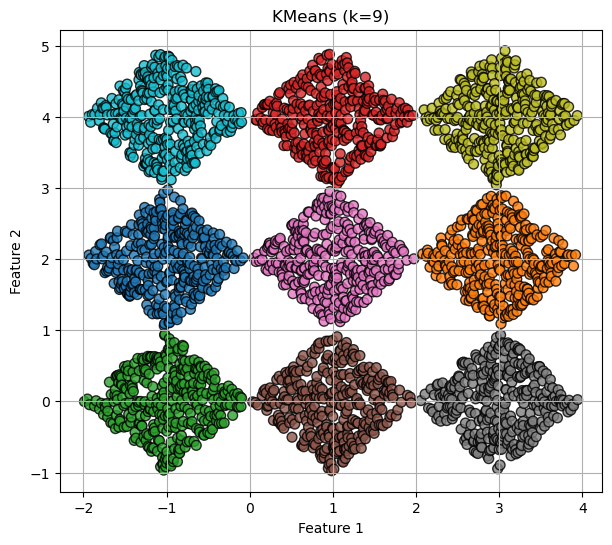

In [10]:
import opti_k_means

def load_arff_data(file_path):
    """Load numeric data from .arff and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)  
    return X

def plot_clusters(data, labels, title):
    plt.figure(figsize=(7, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    arff_file = os.path.join('../dataset', 'artificial', 'diamond9.arff')
    X = load_arff_data(arff_file)
    print("Shape du dataset :", X.shape)



    kmeans, k = opti_k_means.elbow_kmeans(X)
    labels = kmeans.predict(X)

    plot_clusters(X, labels, f"KMeans (k={k})")

## Clustering Agglomératif  

#### Exemple Réussi de Agglomératif : banana.arff avec linkage = single


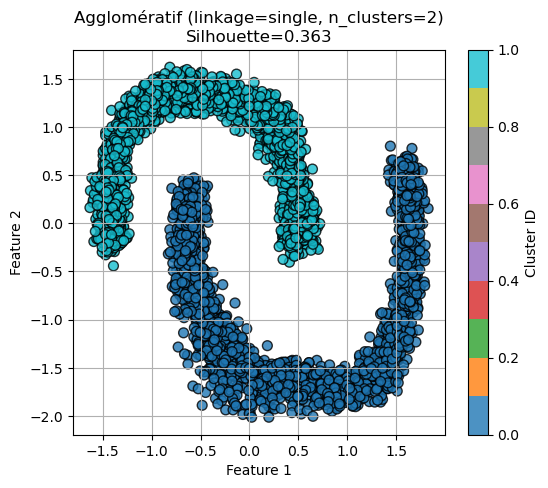

### Comparaison entre les linkages et Analyse

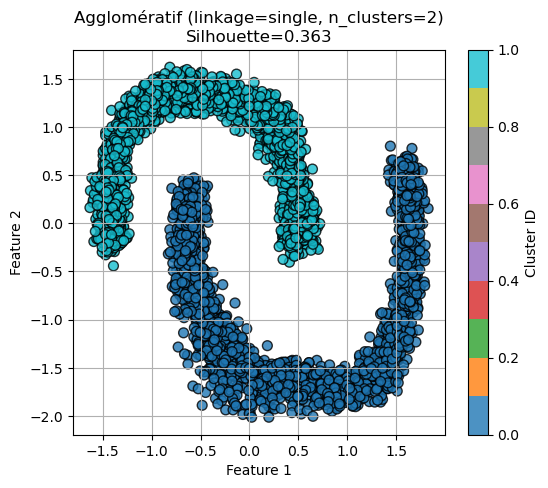
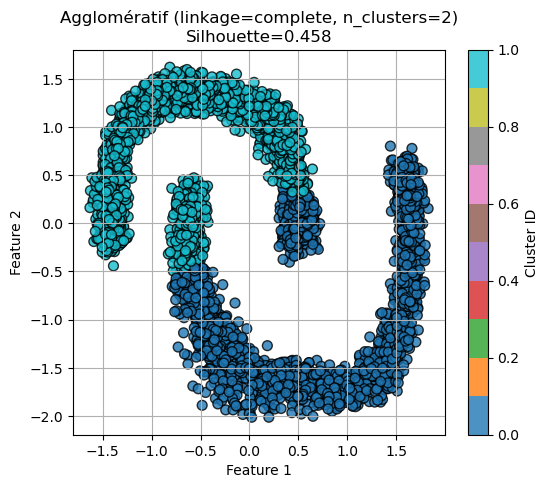
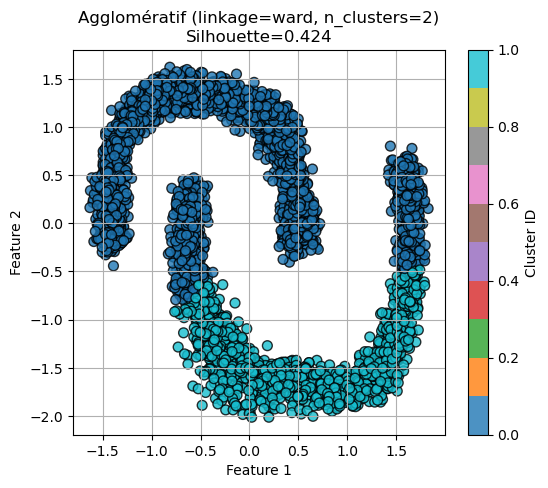
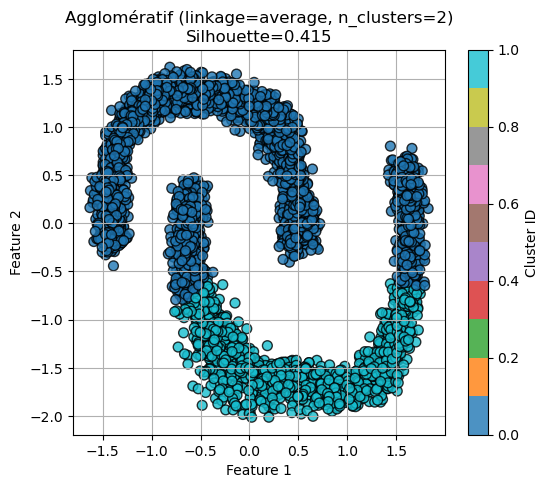



### Interprétation :
Comparaison entre les linkages et analyse
1. Définitions générales

Le clustering hiérarchique agglomératif regroupe progressivement les points en clusters selon une mesure de distance entre groupes, appelée linkage.
La différence entre les méthodes réside dans la manière dont on calcule cette distance inter-groupes.

Type de linkage	   Définition	  Conséquence principale
Single linkage	   Distance minimale entre deux points de clusters différents.  Favorise les chaînes de points proches (effet "chaining"), mais conserve bien les formes convexes.
Complete linkage	  Distance maximale entre deux points de clusters différents.	Produit des clusters compacts et bien séparés, mais sensibles au bruit.
Average linkage	    Moyenne des distances entre tous les points des deux clusters.	Compromis entre single et complete : équilibre entre compacité et flexibilité.
Ward linkage	   Minimise la variance intra-cluster lors de la fusion.	Produit des clusters sphériques, souvent performants sur des données gaussiennes.

2. Analyse des résultats visuels
a. Single linkage
Silhouette = 0.363
Les clusters sont bien séparés le long de la forme en “moons”, ce qui montre que le single linkage parvient à capturer la structure enchaînée et non convexe des données.
Cependant, il peut relier des points éloignés s’il existe une série de points proches entre eux (effet chaîne).
Ici, cet effet est un avantage, car les deux arcs sont continus et le linkage minimal relie efficacement les points de la même courbe.
Conclusion : meilleur choix pour ce dataset (formes non convexes comme “moons”).

b. Complete linkage
Silhouette = 0.458
Le clustering est plus compact mais a tendance à séparer mal certaines parties proches des deux arcs, car il privilégie la distance maximale.
Les clusters sont plus “ronds”, donc moins adaptés à des formes allongées ou enchaînées.
Le score de silhouette est un peu meilleur numériquement, mais visuellement moins pertinent ici.
Conclusion : bon score numérique, mais moins fidèle à la forme réelle.

c. Ward linkage

Silhouette = 0.424
Ward cherche à minimiser la variance intra-cluster, donc il tend à créer des clusters à densité hommogène.
Sur les données en deux lunes, cette approche n’est pas optimale, car la forme n’est pas de densité hommogène.
Les limites des clusters ne suivent pas les courbes naturelles.
Conclusion : adapté à des données isotropes (formes rondes), pas à des structures comme ici.

d. Average linkage

Silhouette = 0.415
Donne un résultat intermédiaire entre single et complete.
Les clusters restent relativement continus tout en évitant les effets de chaîne extrêmes.
Toutefois, il ne suit pas parfaitement la courbure des deux lunes et introduit quelques erreurs de regroupement.
Conclusion : compromis raisonnable, mais pas le plus fidèle à la topologie réelle.

3. Synthèse comparative


| Linkage  | Silhouette | Forme des clusters   | Adapté aux formes non convexes ? | Commentaire |
|-----------|-------------|----------------------|----------------------------------|--------------|
| **Single**   | 0.363 | Allongée, enchaînée | Oui | Capture bien la structure des deux lunes |
| **Complete** | 0.458 | Compacte | Non | Bonne séparation mais structure déformée |
| **Ward**     | 0.424 | forme homogène | Non | Idéal pour des données gaussiennes |
| **Average**  | 0.415 | Intermédiaire | Partiellement | Compromis entre flexibilité et compacité |


4. Conclusion générale

Pour ce dataset en formes non convexes (two moons) :
Le single linkage est le plus pertinent, car il respecte la continuité géométrique des courbes malgré un score de silhouette plus faible.

Pour des jeux de données sphériques ou isotropes :
Ward linkage reste le plus performant, car il minimise efficacement la variance intra-cluster.

Pour des cas mixtes ou bruités :
Average linkage offre un bon compromis entre robustesse et flexibilité.

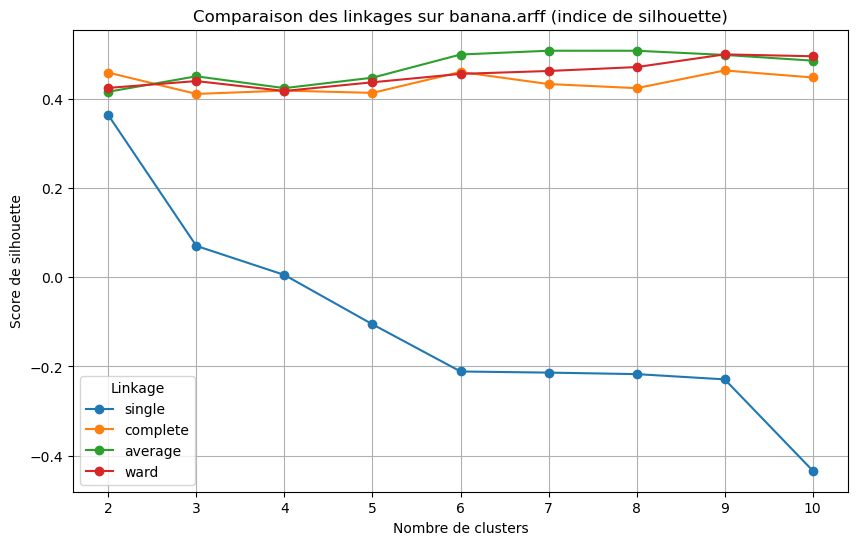

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.io import arff

def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X


dataset_name = 'banana.arff'  # tu peux changer ici
file_path = os.path.join('../dataset', 'artificial', dataset_name)

X = load_arff_data(file_path)
X_scaled = StandardScaler().fit_transform(X)


linkage_list = ['single', 'complete', 'average', 'ward']
n_clusters_range = range(2, 11)  # de 2 à 10 clusters


results = []

for linkage in linkage_list:
    for n_clusters in n_clusters_range:
        # Ward n'accepte que la distance euclidienne
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        
        labels = model.fit_predict(X_scaled)
        
        # Calcul des métriques
        silhouette = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        
        results.append({
            'linkage': linkage,
            'n_clusters': n_clusters,
            'silhouette': silhouette,
            'davies_bouldin': db,
            'calinski_harabasz': ch
        })

df_results = pd.DataFrame(results)

# --- Courbe comparant les silhouettes ---
plt.figure(figsize=(10,6))
for linkage in linkage_list:
    subset = df_results[df_results['linkage'] == linkage]
    plt.plot(subset['n_clusters'].values,
             subset['silhouette'].values,
             marker='o',
             label=linkage)

plt.title(f"Comparaison des linkages sur {dataset_name} (indice de silhouette)")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.legend(title="Linkage")
plt.grid(True)
plt.show()

#### Interpretation : 
1. attribution du score pour faire une évaluation : 
    Le score de silhouette mesure la qualité du partitionnement :
    +1 → points bien regroupés et bien séparés
    0 → clusters se chevauchent
    < 0 → points mal attribués
    Objectif : plus le score est élevé, meilleur est le clustering.

2. Lecture générale de la courbe


| Méthode                       | Comportement observé                                                                                             | Interprétation                                                                                                                                           |
| ----------------------------- | ---------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Single linkage (bleu)**     | Démarre à un niveau moyen (~0.37 pour 2 clusters), puis chute rapidement vers des valeurs négatives dès 4 à 10 clusters. | Présente le phénomène de “chaining effect” : les points proches sont reliés en chaînes, ce qui dégrade la cohérence des clusters lorsque leur nombre augmente. |
| **Complete linkage (orange)** | Reste relativement stable (~0.42 à 0.45), peu sensible à la variation du nombre de clusters.                     | Produit des clusters compacts et bien séparés, mais parfois trop rigides, divisant à tort certaines régions continues du dataset.                   |
| **Average linkage (vert)**    | Offre les meilleurs scores de silhouette (~0.45 à 0.49) avec une grande stabilité.                            | Représente un bon compromis entre compacité et flexibilité : capture efficacement les structures globales du dataset banana.arff sans les surfragmenter. |
| **Ward (rouge)**              | Très stable, avec des scores proches de ceux d’Average (~0.46 à 0.48).                                           | Minimise la variance intra-cluster, ce qui est efficace pour des données isotropes ou bien séparées, mais moins adapté aux structures très non linéaires. |

3. Analyse détaillée du comportement
a. Single linkage

Le score silhouette diminue drastiquement avec le nombre de clusters.
Cela traduit le problème classique du single linkage :
Il relie les points en fonction de la plus petite distance entre clusters, créant ainsi de longues chaînes continues.
Sur un dataset comme banana, où les classes forment des bandes allongées et proches, cette stratégie fusionne artificiellement des zones éloignées → d’où la baisse de silhouette.
En résumé : single linkage est très sensible au bruit et inadapté pour les données non convexes ou en “ruban”.

b. le reste des linkages 

Le score est stable mais légèrement inférieur côté complete à Ward et Average.
Ces méthode se base sur la distance maximale entre clusters,la moyenne des distances inter-clusters :La compacité du complete linkage et la flexibilité du single linkage , la minimisation de la variance intra-cluster
Résultat : certains points périphériques sont mal classés, mais la séparation globale reste cohérente.

